In [50]:
# data = '/home/yun/asr/testD/data'
data = '/home/yun/asr/classification/data/total'

In [51]:
def json_content(contents):
    basic_info = contents["발화정보"]
    stt = basic_info["stt"]
    scriptId = basic_info["scriptId"]
    fileNm = basic_info["fileNm"]
    recrdTime = basic_info["recrdTime"]
    recrdQuality = basic_info["recrdQuality"]
    recrdDt = basic_info["recrdDt"]
    scriptSetNo = basic_info["scriptSetNo"]

    conv_info = contents["대화정보"]
    recrdEnvrn = conv_info["recrdEnvrn"]
    colctUnitCode = conv_info["colctUnitCode"]
    cityCode = conv_info["cityCode"]
    recrdUnit = conv_info["recrdUnit"]
    convrsThema = conv_info["convrsThema"]

    speaker_info = contents["녹음자정보"]
    gender = speaker_info["gender"]
    recorderId = speaker_info["recorderId"]
    age = speaker_info["age"]

    return ([stt, scriptId, fileNm, recrdTime, recrdQuality, recrdDt, scriptSetNo,
             recrdEnvrn, colctUnitCode, cityCode, recrdUnit, convrsThema,
             gender, recorderId, age])

In [52]:
# json 파일 이름: script1_g_0249-6001-01-01-KCY-F-05-A.json
# json 파일 이름: 소아남여_소아남여03_M_1524011367-0_3_수도권_실내_54596.json
# data = '/home/yun/asr/test2/data'

import glob
import json

paths_label = []
json_list = []

for fn in glob.glob(data+'/*.json'):
    with open(fn, 'r') as f:
        contents = json.load(f)
        json_cont = json_content(contents)
        json_list.append(json_cont)
        paths_label.append('/'.join(fn.split('/')[:-1]))

In [53]:
import pandas as pd

json_df = pd.DataFrame(json_list, columns = ['stt', 'scriptId', 'fileNm', 'recrdTime', 'recrdQuality', 'recrdDt', 'scriptSetNo',
                                             'recrdEnvrn', 'colctUnitCode', 'cityCode', 'recrdUnit', 'convrsThema',
                                             'gender', 'recorderId', 'age'])

In [54]:
# json_df['fileNm'] = json_df['fileNm'].str.replace('.wav', '.mp3', regex=True)

In [163]:
json_df = json_df[['fileNm', 'age']]
json_df.rename(columns={'age':'label'}, inplace=True)

In [164]:
json_df.head()

,fileNm,label
0,소아남여_소아남여05_M_1534851666-0_10_수도권_실내_09431.wav,10
1,소아남여_소아남여09_M_1550601156-0_7_수도권_실내_17747.wav,7
2,소아남여_소아남여05_M_1564933972-0_3_수도권_실내_58007.wav,3
3,소아남여_소아남여05_M_1534851666-0_10_수도권_실내_08846.wav,10
4,소아남여_소아남여1001_M_1580950673-1_5_수도권_실내_50338.wav,5


In [165]:
label_df = pd.DataFrame(zip(paths_label), 
                        columns=['path'])
print("path:", label_df['path'][0])

path: /home/yun/asr/classification/data/total


In [166]:
conv_df = pd.concat([label_df, json_df], axis=1)
conv_df.head(1)

,path,fileNm,label
0,/home/yun/asr/classification/data/total,소아남여_소아남여05_M_1534851666-0_10_수도권_실내_09431.wav,10


In [167]:
conv_df['fullpath'] = conv_df['path'] + '/' + conv_df['fileNm']

In [168]:
conv_df.head(1)

,path,fileNm,label,fullpath
0,/home/yun/asr/classification/data/total,소아남여_소아남여05_M_1534851666-0_10_수도권_실내_09431.wav,10,/home/yun/asr/classification/data/total/소아남여_소...


In [169]:
conv_df['fullpath'][0]

'/home/yun/asr/classification/data/total/소아남여_소아남여05_M_1534851666-0_10_수도권_실내_09431.wav'

In [170]:
import pandas as pd

conv_df=conv_df.drop(['path'], axis=1)
conv_df.head()

,fileNm,label,fullpath
0,소아남여_소아남여05_M_1534851666-0_10_수도권_실내_09431.wav,10,/home/yun/asr/classification/data/total/소아남여_소...
1,소아남여_소아남여09_M_1550601156-0_7_수도권_실내_17747.wav,7,/home/yun/asr/classification/data/total/소아남여_소...
2,소아남여_소아남여05_M_1564933972-0_3_수도권_실내_58007.wav,3,/home/yun/asr/classification/data/total/소아남여_소...
3,소아남여_소아남여05_M_1534851666-0_10_수도권_실내_08846.wav,10,/home/yun/asr/classification/data/total/소아남여_소...
4,소아남여_소아남여1001_M_1580950673-1_5_수도권_실내_50338.wav,5,/home/yun/asr/classification/data/total/소아남여_소...


In [ ]:
conv_df.to_csv('classification.csv')

In [116]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [1]:
# 여기서부터 do

#  저장된 csv파일 불러들여 동일한 변수명으로 사용

import pandas as pd

df = pd.read_csv('classification.csv')

In [2]:
df = df.drop(df.columns[[0]], axis = 1)
df

,fileNm,label,fullpath
0,소아남여_소아남여05_M_1534851666-0_10_수도권_실내_09431.wav,10,/home/yun/asr/classification/data/total/소아남여_소...
1,소아남여_소아남여09_M_1550601156-0_7_수도권_실내_17747.wav,7,/home/yun/asr/classification/data/total/소아남여_소...
2,소아남여_소아남여05_M_1564933972-0_3_수도권_실내_58007.wav,3,/home/yun/asr/classification/data/total/소아남여_소...
3,소아남여_소아남여05_M_1534851666-0_10_수도권_실내_08846.wav,10,/home/yun/asr/classification/data/total/소아남여_소...
4,소아남여_소아남여1001_M_1580950673-1_5_수도권_실내_50338.wav,5,/home/yun/asr/classification/data/total/소아남여_소...
...,...,...,...
11995,소아남여_소아남여05_M_1534851666-0_10_수도권_실내_08606.wav,10,/home/yun/asr/classification/data/total/소아남여_소...
11996,소아남여_소아남여09_M_1550601156-0_7_수도권_실내_17414.wav,7,/home/yun/asr/classification/data/total/소아남여_소...
11997,소아남여_소아남여05_M_1552959500-0_8_수도권_실내_09682.wav,8,/home/yun/asr/classification/data/total/소아남여_소...
11998,소아남여_소아남여1001_M_1604451940-5_4_수도권_실내_50653.wav,4,/home/yun/asr/classification/data/total/소아남여_소...


In [3]:
def new_index(values):
    return values - 3

df['label'] = df['label'].apply(new_index)
df

,fileNm,label,fullpath
0,소아남여_소아남여05_M_1534851666-0_10_수도권_실내_09431.wav,7,/home/yun/asr/classification/data/total/소아남여_소...
1,소아남여_소아남여09_M_1550601156-0_7_수도권_실내_17747.wav,4,/home/yun/asr/classification/data/total/소아남여_소...
2,소아남여_소아남여05_M_1564933972-0_3_수도권_실내_58007.wav,0,/home/yun/asr/classification/data/total/소아남여_소...
3,소아남여_소아남여05_M_1534851666-0_10_수도권_실내_08846.wav,7,/home/yun/asr/classification/data/total/소아남여_소...
4,소아남여_소아남여1001_M_1580950673-1_5_수도권_실내_50338.wav,2,/home/yun/asr/classification/data/total/소아남여_소...
...,...,...,...
11995,소아남여_소아남여05_M_1534851666-0_10_수도권_실내_08606.wav,7,/home/yun/asr/classification/data/total/소아남여_소...
11996,소아남여_소아남여09_M_1550601156-0_7_수도권_실내_17414.wav,4,/home/yun/asr/classification/data/total/소아남여_소...
11997,소아남여_소아남여05_M_1552959500-0_8_수도권_실내_09682.wav,5,/home/yun/asr/classification/data/total/소아남여_소...
11998,소아남여_소아남여1001_M_1604451940-5_4_수도권_실내_50653.wav,1,/home/yun/asr/classification/data/total/소아남여_소...


ver2

In [31]:
from sklearn.model_selection import train_test_split

SEED = 42

clas_df =  df[['fullpath', 'label']]
# 추가
clas_df['audio'] = clas_df['fullpath']
clas_train_df, clas_test_df = train_test_split(clas_df, test_size=0.3, random_state = SEED)
clas_train_df.to_csv('classification_train.csv')
clas_valid_df, clas_test_df = train_test_split(clas_test_df, test_size=1/3, random_state = SEED)
clas_valid_df.to_csv('classification_valid.csv')
clas_test_df.to_csv('classification_test.csv')

In [32]:
clas_train_df.head()

,fullpath,label,audio
7729,/home/yun/asr/classification/data/total/소아남여_소...,0,/home/yun/asr/classification/data/total/소아남여_소...
3546,/home/yun/asr/classification/data/total/소아남여_소...,0,/home/yun/asr/classification/data/total/소아남여_소...
3527,/home/yun/asr/classification/data/total/소아남여_소...,1,/home/yun/asr/classification/data/total/소아남여_소...
10159,/home/yun/asr/classification/data/total/소아남여_소...,6,/home/yun/asr/classification/data/total/소아남여_소...
6959,/home/yun/asr/classification/data/total/소아남여_소...,5,/home/yun/asr/classification/data/total/소아남여_소...


In [33]:
from datasets import load_dataset, load_metric, Audio

train = load_dataset("csv", data_files={"train": "classification_train.csv"}, delimiter=",")["train"]
valid = load_dataset("csv", data_files={"valid": "classification_valid.csv"}, delimiter=",")["valid"]
test = load_dataset("csv", data_files={"test": "classification_test.csv"}, delimiter=",")["test"]

#common_voice_train = common_voice_train.remove_columns(['Unnamed: 0'])
print(train)
print(valid)
print(test)

Using custom data configuration default-c5cf15e0a4f5422b


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

Dataset csv downloaded and prepared to /home/yun/.cache/huggingface/datasets/csv/default-c5cf15e0a4f5422b/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Using custom data configuration default-f9ad28872ce1a3ab


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

Dataset csv downloaded and prepared to /home/yun/.cache/huggingface/datasets/csv/default-f9ad28872ce1a3ab/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Using custom data configuration default-91187714c3b2dd97


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

Dataset csv downloaded and prepared to /home/yun/.cache/huggingface/datasets/csv/default-91187714c3b2dd97/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Dataset({
    features: ['Unnamed: 0', 'fullpath', 'label', 'audio'],
    num_rows: 8400
})
Dataset({
    features: ['Unnamed: 0', 'fullpath', 'label', 'audio'],
    num_rows: 2400
})
Dataset({
    features: ['Unnamed: 0', 'fullpath', 'label', 'audio'],
    num_rows: 1200
})


In [34]:
train_df = pd.DataFrame(train)
train_df.head()

,Unnamed: 0,fullpath,label,audio
0,7729,/home/yun/asr/classification/data/total/소아남여_소...,0,/home/yun/asr/classification/data/total/소아남여_소...
1,3546,/home/yun/asr/classification/data/total/소아남여_소...,0,/home/yun/asr/classification/data/total/소아남여_소...
2,3527,/home/yun/asr/classification/data/total/소아남여_소...,1,/home/yun/asr/classification/data/total/소아남여_소...
3,10159,/home/yun/asr/classification/data/total/소아남여_소...,6,/home/yun/asr/classification/data/total/소아남여_소...
4,6959,/home/yun/asr/classification/data/total/소아남여_소...,5,/home/yun/asr/classification/data/total/소아남여_소...


In [35]:
train = train.remove_columns(["Unnamed: 0"])
valid = valid.remove_columns(["Unnamed: 0"])
test = test.remove_columns(["Unnamed: 0"])

In [36]:
train

Dataset({
    features: ['fullpath', 'label', 'audio'],
    num_rows: 8400
})

In [37]:
valid

Dataset({
    features: ['fullpath', 'label', 'audio'],
    num_rows: 2400
})

In [38]:
test

Dataset({
    features: ['fullpath', 'label', 'audio'],
    num_rows: 1200
})

In [39]:
from datasets import Audio
from datasets import ClassLabel
import random
import pandas as pd
from IPython.display import display, HTML

def show_random_elements(dataset, num_examples=10):
    assert num_examples <= len(dataset), "Can't pick more elements than there are in the dataset."
    picks = []
    for _ in range(num_examples):
        pick = random.randint(0, len(dataset)-1)
        while pick in picks:
            pick = random.randint(0, len(dataset)-1)
        picks.append(pick)
    
    df = pd.DataFrame(dataset[picks])
    display(HTML(df.to_html()))

In [40]:
# show_random_elements(train.remove_columns(["audio", "fullpath"]), num_examples=10)

In [42]:
train = train.cast_column("audio", Audio(sampling_rate=16_000))
valid = valid.cast_column("audio", Audio(sampling_rate=16_000))
test = test.cast_column("audio", Audio(sampling_rate=16_000))

In [43]:
train

Dataset({
    features: ['fullpath', 'label', 'audio'],
    num_rows: 8400
})

In [44]:
train[10]

{'fullpath': '/home/yun/asr/classification/data/total/소아남여_소아남여05_M_1571810349-0_9_수도권_실내_09872.wav',
 'label': 6,
 'audio': {'path': '/home/yun/asr/classification/data/total/소아남여_소아남여05_M_1571810349-0_9_수도권_실내_09872.wav',
  'array': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
  'sampling_rate': 16000}}

#### **Fine-tuning for Audio Classification with 🤗 Transformers**

In [45]:
model_checkpoint = "facebook/wav2vec2-base"
batch_size = 16
# batch_size 조정 (원래 32)

In [46]:
%%capture
# !pip install datasets==1.14
!pip install transformers==4.11.3
!pip install librosa

In [47]:
%%capture
!apt install git-lfs

In [48]:
metric = load_metric("accuracy")

In [49]:
import random
from IPython.display import Audio, display

for _ in range(5):
    rand_idx = random.randint(0, len(train)-1)
    example = train[rand_idx]
    audio = example["audio"]

    print('Label:', train['label'][rand_idx])
    print(f'Shape: {audio["array"].shape}, sampling rate: {audio["sampling_rate"]}')
    display(Audio(audio["array"], rate=audio["sampling_rate"]))
    print()

Label: 0
Shape: (47775,), sampling rate: 16000



Label: 3
Shape: (43680,), sampling rate: 16000



Label: 2
Shape: (73710,), sampling rate: 16000



Label: 4
Shape: (61425,), sampling rate: 16000



Label: 6
Shape: (47775,), sampling rate: 16000


In [50]:
from transformers import AutoFeatureExtractor

feature_extractor = AutoFeatureExtractor.from_pretrained(model_checkpoint)
feature_extractor

loading configuration file https://huggingface.co/facebook/wav2vec2-base/resolve/main/config.json from cache at /home/yun/.cache/huggingface/transformers/c7746642f045322fd01afa31271dd490e677ea11999e68660a92619ec7c892b4.ce1f96bfaf3d7475cb8187b9668c7f19437ade45fb9ceb78d2b06a2cec198015
/home/yun/anaconda3/envs/asr/lib/python3.9/site-packages/transformers/configuration_utils.py:336: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
Model config Wav2Vec2Config {
  "activation_dropout": 0.0,
  "apply_spec_augment": true,
  "architectures": [
    "Wav2Vec2ForPreTraining"
  ],
  "attention_dropout": 0.1,
  "bos_token_id": 1,
  "classifier_proj_size": 256,
  "codevector_dim": 256,
  "contrastive_logits_temperature": 0.1,
  "conv_bias": false,
  "c

Wav2Vec2FeatureExtractor {
  "do_normalize": true,
  "feature_extractor_type": "Wav2Vec2FeatureExtractor",
  "feature_size": 1,
  "padding_side": "right",
  "padding_value": 0.0,
  "return_attention_mask": false,
  "sampling_rate": 16000
}

In [51]:
max_duration = 5.0  # seconds

In [52]:
def preprocess_function(examples):
    audio_arrays = [x["array"] for x in examples["audio"]]
    inputs = feature_extractor(
        audio_arrays, 
        sampling_rate=feature_extractor.sampling_rate, 
        max_length=int(feature_extractor.sampling_rate * max_duration), 
        truncation=True, 
    )
    return inputs

In [53]:
preprocess_function(train[:5])

/home/yun/anaconda3/envs/asr/lib/python3.9/site-packages/transformers/feature_extraction_utils.py:158: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)


{'input_values': [array([-0.0001906, -0.0001906, -0.0001906, ..., -0.0001906, -0.0001906,
       -0.0001906], dtype=float32), array([0.00015726, 0.00015726, 0.00015726, ..., 0.00015726, 0.00015726,
       0.00015726], dtype=float32), array([0.00317682, 0.00317682, 0.00317682, ..., 0.00403793, 0.00403793,
       0.00231571], dtype=float32), array([-8.6349667e-07, -8.6349667e-07, -8.6349667e-07, ...,
       -2.6357977e-04, -8.6349667e-07, -8.6349667e-07], dtype=float32), array([-4.0124396e-05, -4.0124396e-05, -4.0124396e-05, ...,
       -4.0124396e-05, -4.0124396e-05, -4.0124396e-05], dtype=float32)]}

In [54]:
encoded_train = train.map(preprocess_function, remove_columns=["audio", "fullpath"], batched=True)
encoded_valid = valid.map(preprocess_function, remove_columns=["audio", "fullpath"], batched=True)
encoded_test = test.map(preprocess_function, remove_columns=["audio", "fullpath"], batched=True)

print(encoded_train)
print(encoded_valid)
print(encoded_test)

  0%|          | 0/9 [00:00<?, ?ba/s]

/home/yun/anaconda3/envs/asr/lib/python3.9/site-packages/transformers/feature_extraction_utils.py:158: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)


  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

Dataset({
    features: ['label', 'input_values'],
    num_rows: 8400
})
Dataset({
    features: ['label', 'input_values'],
    num_rows: 2400
})
Dataset({
    features: ['label', 'input_values'],
    num_rows: 1200
})


In [55]:
from transformers import AutoModelForAudioClassification, TrainingArguments, Trainer

num_labels = 8
model = AutoModelForAudioClassification.from_pretrained(
    model_checkpoint, 
    num_labels=8,
    num_attention_heads = 8,
    num_hidden_layers = 8
    # label2id=label2id,
    # id2label=id2label,
)

loading configuration file https://huggingface.co/facebook/wav2vec2-base/resolve/main/config.json from cache at /home/yun/.cache/huggingface/transformers/c7746642f045322fd01afa31271dd490e677ea11999e68660a92619ec7c892b4.ce1f96bfaf3d7475cb8187b9668c7f19437ade45fb9ceb78d2b06a2cec198015
/home/yun/anaconda3/envs/asr/lib/python3.9/site-packages/transformers/configuration_utils.py:336: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
Model config Wav2Vec2Config {
  "activation_dropout": 0.0,
  "apply_spec_augment": true,
  "architectures": [
    "Wav2Vec2ForPreTraining"
  ],
  "attention_dropout": 0.1,
  "bos_token_id": 1,
  "classifier_proj_size": 256,
  "codevector_dim": 256,
  "contrastive_logits_temperature": 0.1,
  "conv_bias": false,
  "c

In [56]:
model_name = model_checkpoint.split("/")[-1]

args = TrainingArguments(
    f"{model_name}-finetuned-ks",
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=3e-5,
    per_device_train_batch_size=batch_size,
    gradient_accumulation_steps=4,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=5,
    warmup_ratio=0.1,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    report_to="none",
    # push_to_hub=True,
)

PyTorch: setting up devices


In [57]:
import numpy as np

def compute_metrics(eval_pred):
    """Computes accuracy on a batch of predictions"""
    predictions = np.argmax(eval_pred.predictions, axis=1)
    return metric.compute(predictions=predictions, references=eval_pred.label_ids)

In [58]:
trainer = Trainer(
    model,
    args,
    train_dataset=encoded_train,
    eval_dataset=encoded_valid,
    tokenizer=feature_extractor,
    compute_metrics=compute_metrics
)

In [59]:
trainer.train()

***** Running training *****
  Num examples = 8400
  Num Epochs = 5
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 128
  Gradient Accumulation steps = 4
  Total optimization steps = 325
/home/yun/anaconda3/envs/asr/lib/python3.9/site-packages/torch/nn/parallel/_functions.py:65: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss,Accuracy
0,1.655200,1.503135,0.652500
1,0.990600,0.920929,0.865417
2,0.716200,0.615482,0.939583
3,0.537900,0.471557,0.960000
4,0.454900,0.424858,0.965417


***** Running Evaluation *****
  Num examples = 2400
  Batch size = 32
Saving model checkpoint to wav2vec2-base-finetuned-ks/checkpoint-65
Configuration saved in wav2vec2-base-finetuned-ks/checkpoint-65/config.json
Model weights saved in wav2vec2-base-finetuned-ks/checkpoint-65/pytorch_model.bin
Configuration saved in wav2vec2-base-finetuned-ks/checkpoint-65/preprocessor_config.json
/home/yun/anaconda3/envs/asr/lib/python3.9/site-packages/torch/nn/parallel/_functions.py:65: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
***** Running Evaluation *****
  Num examples = 2400
  Batch size = 32
Saving model checkpoint to wav2vec2-base-finetuned-ks/checkpoint-130
Configuration saved in wav2vec2-base-finetuned-ks/checkpoint-130/config.json
Model weights saved in wav2vec2-base-finetuned-ks/checkpoint-130/pytorch_model.bin
Configuration saved in 

TrainOutput(global_step=325, training_loss=1.0022014214442327, metrics={'train_runtime': 1870.0055, 'train_samples_per_second': 22.46, 'train_steps_per_second': 0.174, 'total_flos': 1.299944847940151e+18, 'train_loss': 1.0022014214442327, 'epoch': 4.99})

In [60]:
trainer.evaluate()

***** Running Evaluation *****
  Num examples = 2400
  Batch size = 32
/home/yun/anaconda3/envs/asr/lib/python3.9/site-packages/torch/nn/parallel/_functions.py:65: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


{'eval_loss': 0.4248581826686859,
 'eval_accuracy': 0.9654166666666667,
 'eval_runtime': 74.9532,
 'eval_samples_per_second': 32.02,
 'eval_steps_per_second': 1.001,
 'epoch': 4.99}

evaluation

In [61]:
import librosa
from sklearn.metrics import classification_report

In [63]:
# test_dataset = load_dataset("csv", data_files={"test": "/content/data/test.csv"}, delimiter="\t")["test"]
test_dataset = load_dataset("csv", data_files={"test": "classification_test.csv"}, delimiter=",")["test"]
test_dataset = test_dataset.remove_columns(["Unnamed: 0"])

test_dataset

Using custom data configuration default-91187714c3b2dd97
Found cached dataset csv (/home/yun/.cache/huggingface/datasets/csv/default-91187714c3b2dd97/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317)


  0%|          | 0/1 [00:00<?, ?it/s]

Dataset({
    features: ['fullpath', 'label', 'audio'],
    num_rows: 1200
})

In [65]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

Device: cuda


In [145]:
valid.shape

(2400, 3)

## 결과

In [86]:
feature_extractor

Wav2Vec2FeatureExtractor {
  "do_normalize": true,
  "feature_extractor_type": "Wav2Vec2FeatureExtractor",
  "feature_size": 1,
  "padding_side": "right",
  "padding_value": 0.0,
  "return_attention_mask": false,
  "sampling_rate": 16000
}

In [128]:
import matplotlib.pyplot as plt

def print_stats(waveform, sample_rate=None, src=None):
  if src:
    print("-" * 10)
    print("Source:", src)
    print("-" * 10)
  if sample_rate:
    print("Sample Rate:", sample_rate)
  print("Shape:", tuple(waveform.shape))
  print("Dtype:", waveform.dtype)
  print(f" - Max:     {waveform.max().item():6.3f}")
  print(f" - Min:     {waveform.min().item():6.3f}")
  print(f" - Mean:    {waveform.mean().item():6.3f}")
  print(f" - Std Dev: {waveform.std().item():6.3f}")
  print()
  print(waveform)
  print()

def plot_waveform(waveform, sample_rate, title="Waveform", xlim=None, ylim=None):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  time_axis = torch.arange(0, num_frames) / sample_rate

  figure, axes = plt.subplots(num_channels, 1)
  if num_channels == 1:
    axes = [axes]
  for c in range(num_channels):
    axes[c].plot(time_axis, waveform[c], linewidth=1)
    axes[c].grid(True)
    if num_channels > 1:
      axes[c].set_ylabel(f'Channel {c+1}')
    if xlim:
      axes[c].set_xlim(xlim)
    if ylim:
      axes[c].set_ylim(ylim)
  figure.suptitle(title)
  plt.show(block=False)

def plot_specgram(waveform, sample_rate, title="Spectrogram", xlim=None):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  time_axis = torch.arange(0, num_frames) / sample_rate

  figure, axes = plt.subplots(num_channels, 1)
  if num_channels == 1:
    axes = [axes]
  for c in range(num_channels):
    axes[c].specgram(waveform[c], Fs=sample_rate)
    if num_channels > 1:
      axes[c].set_ylabel(f'Channel {c+1}')
    if xlim:
      axes[c].set_xlim(xlim)
  figure.suptitle(title)
  plt.show(block=False)

def play_audio(waveform, sample_rate):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  if num_channels == 1:
    display(Audio(waveform[0], rate=sample_rate))
  elif num_channels == 2:
    display(Audio((waveform[0], waveform[1]), rate=sample_rate))
  else:
    raise ValueError("Waveform with more than 2 channels are not supported.")

Sample Rate: 16000
Shape: (1, 64155)
Dtype: torch.float32
 - Max:      0.501
 - Min:     -0.516
 - Mean:     0.000
 - Std Dev:  0.058

tensor([[0., 0., 0.,  ..., 0., 0., 0.]])



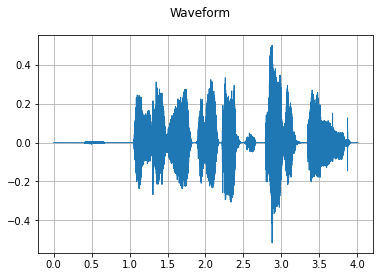

/home/yun/anaconda3/envs/asr/lib/python3.9/site-packages/matplotlib/axes/_axes.py:7622: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


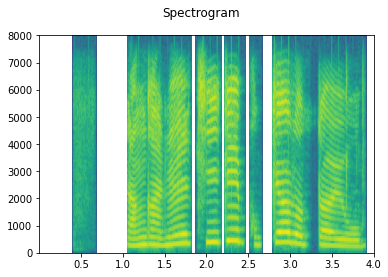

In [129]:
import torchaudio

waveform, sample_rate = torchaudio.load('/home/yun/asr/classification/data/total/소아남여_소아남여03_M_1524011367-0_3_수도권_실내_54596.wav')

print_stats(waveform, sample_rate=sample_rate)
plot_waveform(waveform, sample_rate)
plot_specgram(waveform, sample_rate)
play_audio(waveform, sample_rate)

In [134]:
import torchaudio

def speech_file_to_array_fn(batch):
    speech_array, sampling_rate = torchaudio.load(batch["fullpath"])
    speech_array = speech_array.squeeze().numpy()
    speech_array = librosa.resample(np.asarray(speech_array), sampling_rate, feature_extractor.sampling_rate)

    batch["speech"] = speech_array
    return batch


def predict(batch):
    features = feature_extractor(batch["speech"], sampling_rate=feature_extractor.sampling_rate, return_tensors="pt", padding=True)

    input_values = features.input_values.to(device)
    # attention_mask = features.attention_mask.to(device)

    with torch.no_grad():
        logits = model(input_values).logits # attention_mask 수정

    pred_ids = torch.argmax(logits, dim=-1).detach().cpu().numpy()
    batch["predicted"] = pred_ids
    return batch

In [135]:
model_name = '/home/yun/asr/classification/wav2vec2-base-finetuned-ks'

In [136]:
processor = feature_extractor

In [137]:
test_dataset = test_dataset.map(speech_file_to_array_fn)

  0%|          | 0/1200 [00:00<?, ?ex/s]

/tmp/ipykernel_3113524/1744503345.py:6: FutureWarning: Pass orig_sr=16000, target_sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  speech_array = librosa.resample(np.asarray(speech_array), sampling_rate, feature_extractor.sampling_rate)


In [138]:
result = test_dataset.map(predict, batched=True, batch_size=8)

  0%|          | 0/150 [00:00<?, ?ba/s]

In [139]:
y_true = [test["label"][i] for i in result["label"]]
y_pred = result["predicted"]

print(y_true[:50])
print(y_pred[:50])

[0, 5, 0, 1, 6, 4, 3, 3, 4, 1, 4, 0, 4, 1, 4, 0, 3, 5, 3, 4, 5, 3, 6, 5, 1, 0, 0, 3, 0, 6, 3, 5, 5, 0, 6, 6, 6, 5, 6, 5, 5, 0, 5, 5, 0, 0, 0, 6, 4, 4]
[0, 6, 0, 4, 1, 3, 5, 5, 3, 4, 3, 2, 3, 4, 3, 0, 5, 7, 5, 3, 6, 5, 1, 6, 4, 2, 2, 5, 0, 1, 5, 6, 6, 2, 1, 1, 1, 6, 1, 6, 7, 2, 6, 6, 2, 2, 2, 1, 3, 3]


In [140]:
print(len(y_true))
print(len(y_pred))

1200
1200


In [141]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, y_pred)

array([[137,   1, 151,   3,   2,   1,   0,   0],
       [  1,   0,   2,   1, 137,   1,   3,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   4,   0, 137,   1,   2],
       [  0,   0,   5, 144,   2,   0,   0,   0],
       [  0,   0,   0,   2,   4,   2, 157, 155],
       [  4, 139,   0,   0,   2,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0]])

In [142]:
label_names = ['0', '1', '2', '3', '4', '5', '6', '7']
print(classification_report(y_true, y_pred, target_names=label_names))

              precision    recall  f1-score   support

           0       0.96      0.46      0.63       295
           1       0.00      0.00      0.00       145
           2       0.00      0.00      0.00         0
           3       0.03      0.03      0.03       144
           4       0.01      0.01      0.01       151
           5       0.01      0.01      0.01       320
           6       0.00      0.00      0.00       145
           7       0.00      0.00      0.00         0

    accuracy                           0.12      1200
   macro avg       0.13      0.06      0.08      1200
weighted avg       0.25      0.12      0.16      1200



/home/yun/anaconda3/envs/asr/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yun/anaconda3/envs/asr/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yun/anaconda3/envs/asr/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
    print('Not connected to a GPU')
else:
    print(gpu_info)

Thu Dec  1 11:13:04 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.141.03   Driver Version: 470.141.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
|  0%   45C    P8    28W / 420W |     19MiB / 24268MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:02:00.0 Off |                  N/A |
|  0%   